In [36]:
import pandas as pd

data = pd.read_csv('tumor.csv')

# Convert the DataFrame head to HTML
html_table = data.head().to_html()

# Write the HTML table to a file
with open('templates/data_head.html', 'w') as f:
    f.write(html_table)

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Exploration and Cleaning

In [2]:
#Check for Missing Values
missing_values = data.isnull().sum()
print(missing_values)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [3]:
# Summary statistics
summary_statistics = data.describe()
print(summary_statistics)

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

In [4]:
# Check data types
data_type = data.dtypes
print(data_type)

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [5]:
# check duplicates
duplicates = data.duplicated().sum()
print(duplicates)

8


In [6]:
# Find duplicated rows (considering all duplicates, including the first occurrence)
duplicated_rows = data[data.duplicated(keep=False)]

# Display duplicated rows
print(duplicated_rows)


     Sample code number  Clump Thickness  Uniformity of Cell Size  \
40              1100524                6                       10   
60              1116116                9                       10   
162             1198641                3                        1   
201             1218860                1                        1   
202             1218860                1                        1   
245             1100524                6                       10   
246             1116116                9                       10   
250             1198641                3                        1   
259              320675                3                        3   
264              320675                3                        3   
302              704097                1                        1   
324              704097                1                        1   
545             1321942                5                        1   
546             1321942           

In [7]:
#Remove duplicates and keep the first occurance 
data= data.drop_duplicates()

# Check the shape of the data to verify rows are removed
print(data.shape)
data.describe()

(675, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Exploratory Data Analysis EDA


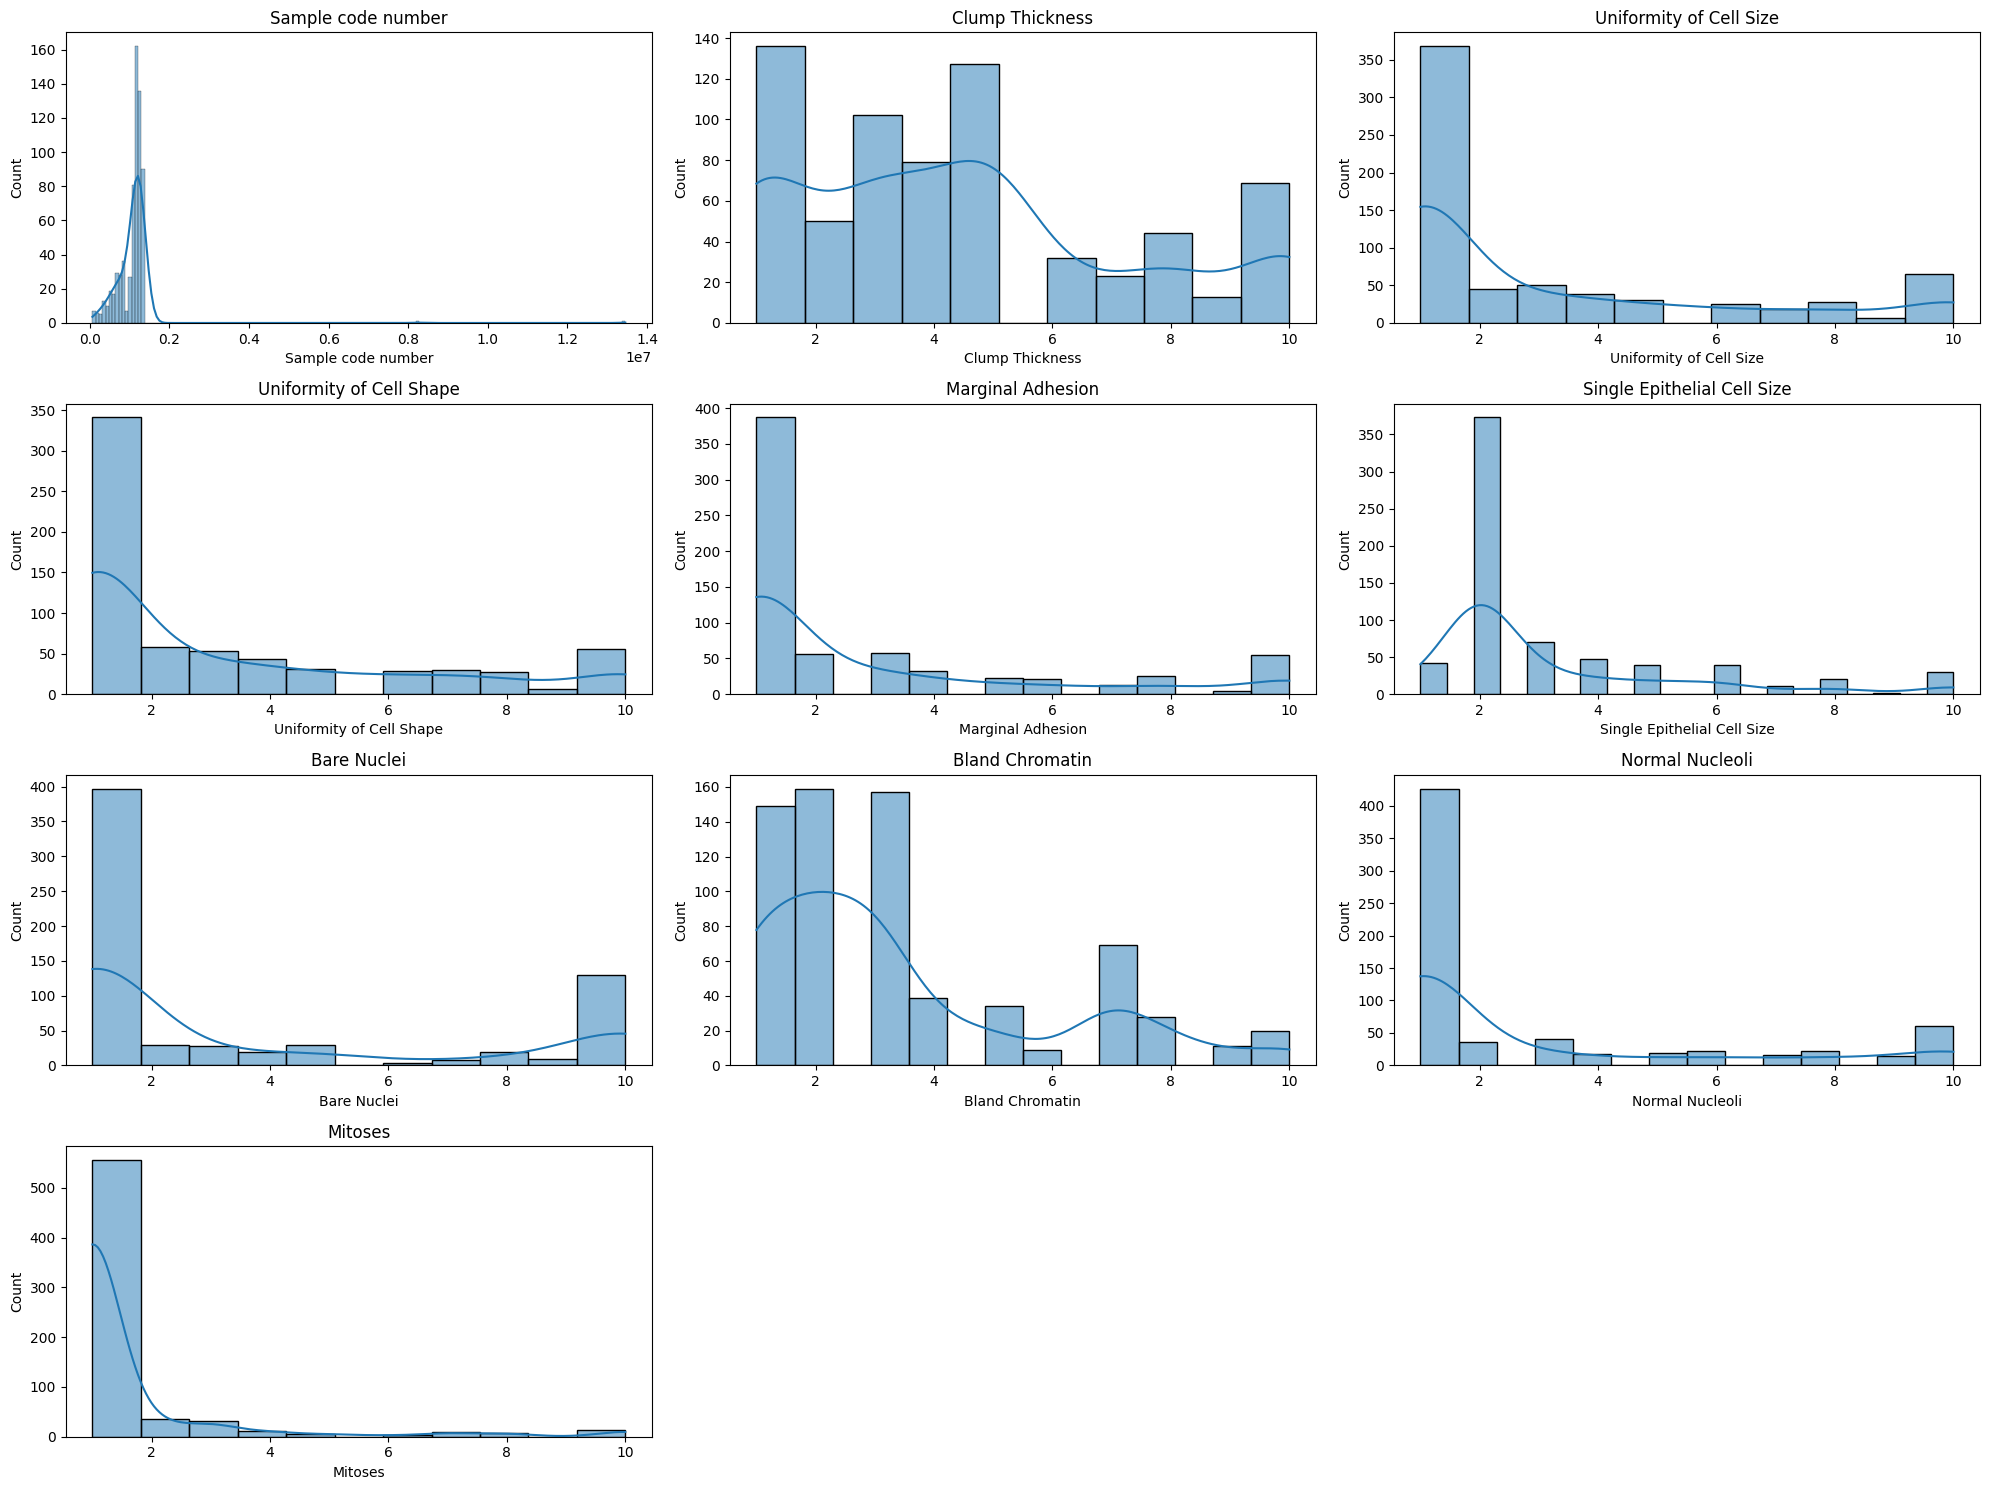

In [8]:
#Visualize the ditribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import random

# Setting up the figure for distribution plots
plt.figure(figsize=(20,15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


In [9]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
2    439
4    236
Name: count, dtype: int64


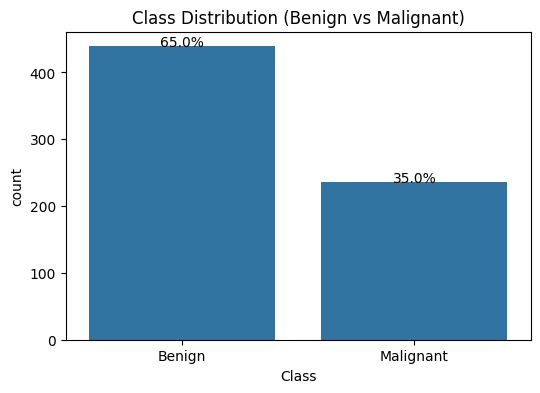

In [10]:
# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data['Class'])
plt.title('Class Distribution (Benign vs Malignant)')
# Update the x-tick labels to match the class values
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

# Calculate percentages and annotate the countplot
total = len(data['Class'])  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # Set the x position of the text
    y = p.get_y() + p.get_height()     # Set the y position of the text
    ax.annotate(percentage, (x, y), ha='center')  # Place the text on the plot

plt.show()


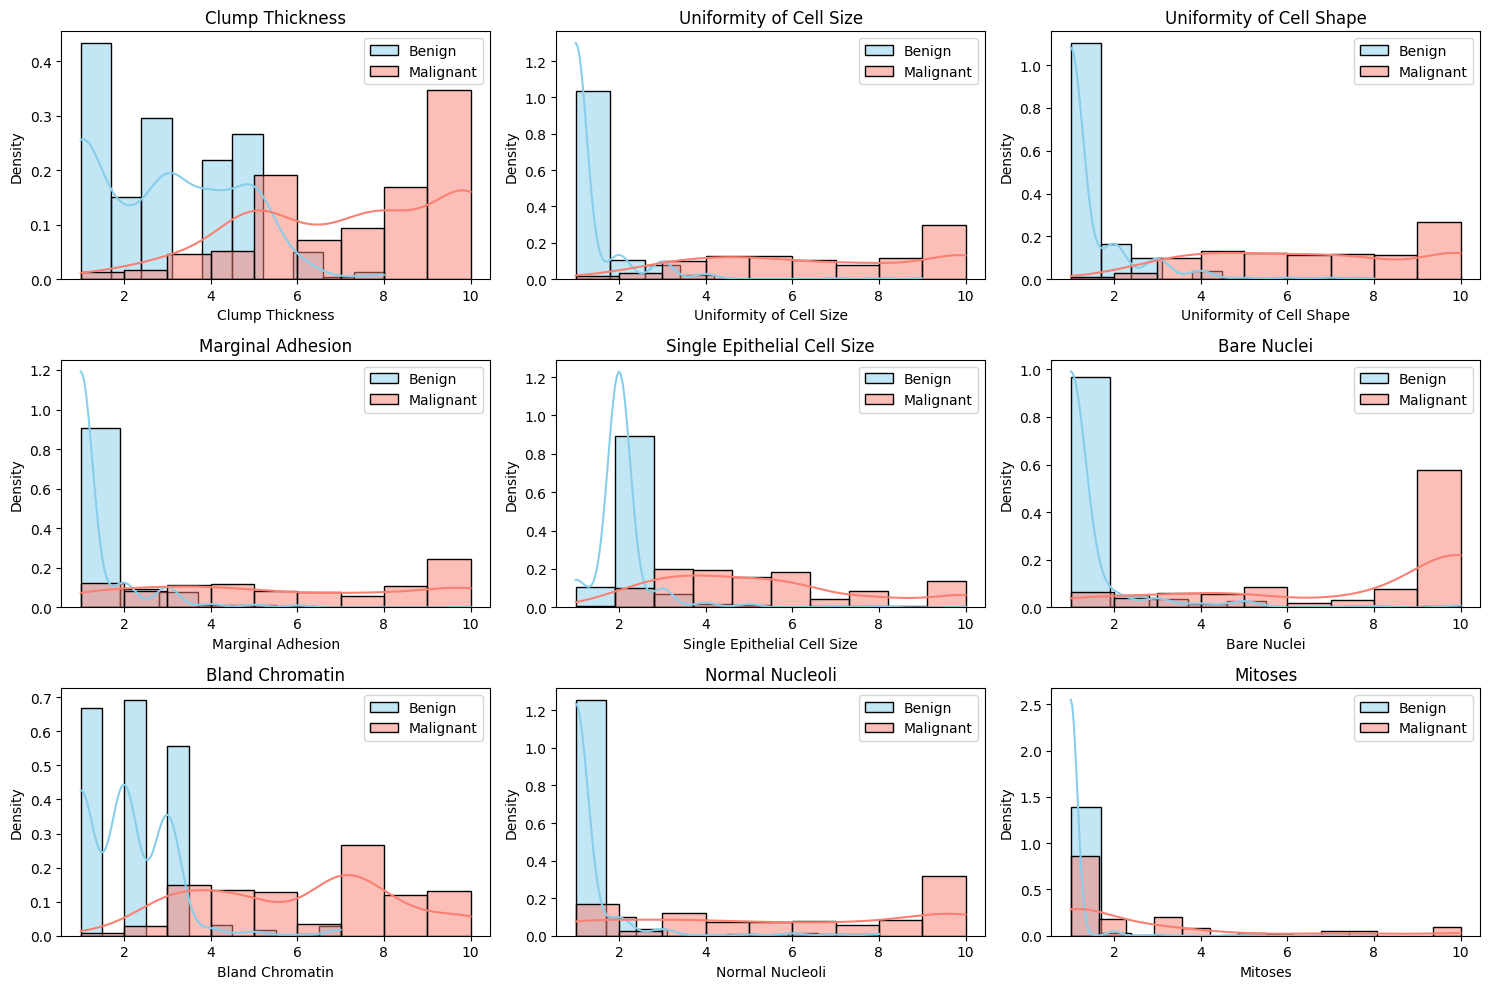

In [11]:
# List of features to plot, assuming the 'Class' column is the last column
features = data.columns[1:-1]

# Setting up the plotting area, 3 rows of subplots, and 3 columns
plt.figure(figsize=(15, 10))

# Loop through each feature to create a subplot for each
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)  # Create a new subplot for each feature
    # Plot the distribution for benign tumors
    sns.histplot(data[data['Class'] == 2][feature], color='skyblue', label='Benign', kde=True, stat="density", common_norm=False)
    # Plot the distribution for malignant tumors
    sns.histplot(data[data['Class'] == 4][feature], color='salmon', label='Malignant', kde=True, stat="density", common_norm=False)
    plt.title(feature)  # Set the title of the subplot to the feature name
    plt.legend()  # Add a legend to differentiate benign vs malignant

plt.tight_layout()  # Adjust the layout so plots don't overlap
plt.show()  # Display the plots


## Interpretations:
#### Clump Thickness:
There's a clear distinction between the two classes. Benign samples mostly have lower clump thickness, while malignant samples are more evenly distributed across different thicknesses, suggesting that higher clump thickness could be indicative of malignancy.
#### Uniformity of Cell Size:
This feature shows a stark contrast between benign and malignant classes, with benign largely clustered at the lower end and malignant spread out over higher values. This suggests that uniformity of cell size is a strong feature for predicting malignancy.
#### Uniformity of Cell Shape:
Similar to cell size, cell shape uniformity is more variable in malignant samples and mostly lower in benign ones. This feature also appears to be a strong predictor.
#### Marginal Adhesion:
The benign class mostly shows lower adhesion, while the malignant class has a wider distribution, indicating higher adhesion values may be associated with malignancy.
#### Single Epithelial Cell Size:
We see a similar pattern to marginal adhesion, with benign cells showing smaller sizes. There's a significant spread in malignant samples, pointing to larger epithelial cell sizes in malignant cases.
#### Bare Nuclei:
There's a notable peak at the lowest value for benign tumors, while malignant tumors have a wider spread, suggesting higher bare nuclei counts could be related to malignancy.
#### Bland Chromatin:
A larger spread and higher values are more apparent in the malignant class, while benign class values cluster at the low end.
#### Normal Nucleoli:
The benign class again tends to cluster at lower values, while the malignant class is spread out, with a tendency towards higher values.
#### Mitoses:
Both classes are mostly concentrated at the lower end of the scale, which suggests that while mitoses rate might be useful, it may not be as strong a discriminator as some of the other features.

Across almost all features, the benign class is characterized by lower values, while the malignant class often shows a more spread out distribution, reaching into higher values. This pattern across multiple features suggests that higher measurements are generally indicative of malignancy. This aligns with the understanding that cancer cells tend to be more variable and less regulated in their growth and division, which would be reflected in features like size uniformity, shape uniformity, and chromatin spread.

From a machine learning perspective, features with distributions that clearly separate between benign and malignant classes are likely to be more informative for model training. Features like uniformity of cell size and shape, bare nuclei, and bland chromatin stand out particularly in this regard.

### feature selection

In [12]:

from scipy.stats import ttest_ind


# Separate the dataset into benign and malignant based on the 'Class' column.
benign = data[data['Class'] == 2]
malignant = data[data['Class'] == 4]

# Initialize an empty dictionary to store t-test results.
t_test_results = {}

# Loop through each feature and perform a t-test.
for feature in data.columns[1:-1]:  # Exclude the 'Class' column.
    t_stat, p_val = ttest_ind(benign[feature], malignant[feature], equal_var=False)
    t_test_results[feature] = p_val

# Convert the t-test results dictionary to a DataFrame for easier analysis.
t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index', columns=['P-Value'])

# Display features with a p-value less than 0.05, which indicates statistical significance.
significant_features = t_test_df[t_test_df['P-Value'] < 0.05]
print(significant_features)


                                  P-Value
Clump Thickness              7.268003e-76
Uniformity of Cell Size      1.762249e-83
Uniformity of Cell Shape     7.924294e-87
Marginal Adhesion            5.537800e-55
Single Epithelial Cell Size  2.111984e-53
Bare Nuclei                  5.496021e-87
Bland Chromatin              1.093556e-73
Normal Nucleoli              4.238671e-57
Mitoses                      2.528759e-17


All the tested features show significant differences and are likely to be important predictors in distinguishing between benign and malignant tumors. (all p-values <<< 0.05)

### Features standardization and Data splitting

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=data.drop('Sample code number', axis=1)
X = data.drop('Class', axis=1)  # Features
y = data['Class'].replace({2: 0, 4: 1})  # benign as 0 and malignant as 1

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data with the same scaler
X_test_scaled = scaler.transform(X_test)

# Data is now ready to be used for model training and testing.


### Logestic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
predictions_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, predictions_logreg))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.89      0.94        55

    accuracy                           0.96       135
   macro avg       0.97      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



### k-Nearest Neighbors (k-NN):

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
predictions_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions_knn))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.89      0.94        55

    accuracy                           0.96       135
   macro avg       0.97      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



### Support Vector Machine (SVM):

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')  #  can try different kernels like 'rbf', 'poly', etc.
svm.fit(X_train_scaled, y_train)
predictions_svm = svm.predict(X_test_scaled)
print(classification_report(y_test, predictions_svm))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.89      0.94        55

    accuracy                           0.96       135
   macro avg       0.97      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



### Decision Trees:

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
predictions_tree = tree.predict(X_test_scaled)
print(classification_report(y_test, predictions_tree))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95        80
           1       0.98      0.85      0.91        55

    accuracy                           0.93       135
   macro avg       0.94      0.92      0.93       135
weighted avg       0.94      0.93      0.93       135



### Random Forest:

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
predictions_forest = forest.predict(X_test_scaled)
print(classification_report(y_test, predictions_forest))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        80
           1       1.00      0.87      0.93        55

    accuracy                           0.95       135
   macro avg       0.96      0.94      0.95       135
weighted avg       0.95      0.95      0.95       135



### Gradient Boosting Machines (GBM):

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train_scaled, y_train)
predictions_gbm = gbm.predict(X_test_scaled)
print(classification_report(y_test, predictions_gbm))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96        80
           1       0.98      0.91      0.94        55

    accuracy                           0.96       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



### Cross-validation:

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}



# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation
for name, model in models.items():
    # We create a pipeline to standardize the data and then fit the model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Perform cross-validation and then calculate the mean score
    cv_scores = cross_val_score(pipeline, X_scaled, y, cv=5, scoring='accuracy')
    
    # Print out the mean cross-validation score
    print(f"{name}: Mean CV accuracy = {cv_scores.mean():.4f}")


Logistic Regression: Mean CV accuracy = 0.9644
KNN: Mean CV accuracy = 0.9659
SVC: Mean CV accuracy = 0.9674
Decision Tree: Mean CV accuracy = 0.9289
Random Forest: Mean CV accuracy = 0.9644
Gradient Boosting: Mean CV accuracy = 0.9570


Classification Report

Precision:

Class 0 (Benign): 0.92 – Of all cases predicted as benign, 92% are actually benign.

Class 1 (Malignant): 1.00 – Of all cases predicted as malignant, 100% are actually malignant.

Recall:

Class 0 (Benign): 1.00 – The model correctly identified all benign cases.

Class 1 (Malignant): 0.87 – The model correctly identified 87% of the malignant cases.

F1-Score:

Class 0 (Benign): 0.96 – High F1-score for benign cases indicates a good balance between precision and recall.

Class 1 (Malignant): 0.93 – A slightly lower F1-score for malignant cases due to lower recall.

Accuracy:
0.95 – Overall, 95% of the predictions were correct.

Confusion Matrix

The matrix shows 80 true negatives (TN) and 48 true positives (TP).
There are 0 false positives (FP) and 7 false negatives (FN).
The absence of false positives indicates that the model is very careful not to misclassify benign cases as malignant, which is crucial in medical diagnostics to avoid unnecessary treatments or interventions.

ROC-AUC Score

The ROC-AUC score of approximately 0.999 is outstanding. This score is a measure of the model's ability to distinguish between the classes. A score close to 1 indicates that the model has excellent measure of separability.

Interpretation

The model shows high effectiveness in predicting tumor classes, especially in correctly identifying all benign cases. However, there's a small number of malignant cases that are missed (7 FN).

The perfect precision for malignant cases and no false positives is particularly important in a medical context, as it suggests the model is reliable in its identifications of malignant cases — a critical aspect in cancer diagnosis.

The high ROC-AUC score further underscores the model's ability to accurately classify the cases.

Random Forest model's high performance in both cross-validation and the holdout test set suggests it is a strong candidate for the predictive task.

### Hyperparameter tuning:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Find the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


### Model evaluation:

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Use the best estimator found by the grid search
best_rf = grid_search.best_estimator_

# Predictions on the test set
predictions = best_rf.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        80
           1       1.00      0.87      0.93        55

    accuracy                           0.95       135
   macro avg       0.96      0.94      0.95       135
weighted avg       0.95      0.95      0.95       135

Confusion Matrix:
 [[80  0]
 [ 7 48]]
ROC-AUC Score: 0.9986363636363635




Model Performance Metrics: 

The classification reports for each model show a breakdown of precision, recall, and F1-score. Random Forest, after hyperparameter tuning, shows a high level of precision, particularly in identifying malignant tumors (Class 1). However, there are some false negatives (7 cases of malignant tumors were classified as benign), as indicated by the recall of 0.87 for Class 1.

Confusion Matrix for Random Forest: The confusion matrix further illustrates the model's performance:


80 True Negatives (TN): Correctly identified as benign.

48 True Positives (TP): Correctly identified as malignant.

0 False Positives (FP): None of the benign tumors were incorrectly identified as malignant.

7 False Negatives (FN): Malignant tumors that were incorrectly identified as benign.

ROC-AUC Score: 

A very high ROC-AUC score (nearly 1) for the Random Forest model indicates excellent ability to distinguish between benign and malignant classes.

Cross-Validation Results: 

The mean cross-validation accuracies for all models are quite high, with SVC showing the highest. However, Random Forest also shows strong performance, and its performance in the holdout test is impressive.

Best Parameters for Random Forest:

The best parameters from hyperparameter tuning (max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 300) suggest that a more complex model (higher number of trees and deeper trees) is effective for this dataset.

### Feature Importance Analysis

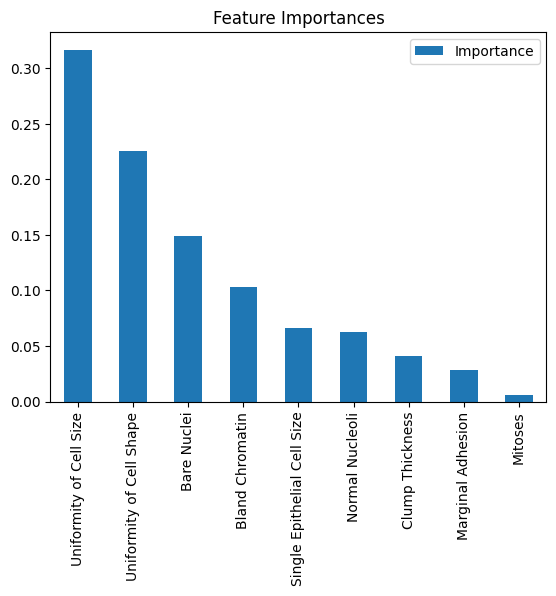

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
importances = best_rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])

# Sort the DataFrame
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot
feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()


In [24]:

# Create a DataFrame from the test set
test_df = pd.DataFrame(X_test_scaled, columns=data.columns[:-1])  # Exclude 'Class' column

# Add actual and predicted labels
test_df['Actual'] = y_test.reset_index(drop=True)
test_df['Predicted'] = predictions

# Identify false negatives
false_negatives = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 0)]

# Analyze the characteristics of false negatives
print("False Negatives Characteristics:")
print(false_negatives.describe())

# You might want to compare this with the characteristics of true positives
true_positives = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)]
print("\nTrue Positives Characteristics:")
print(true_positives.describe())

False Negatives Characteristics:
       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count         7.000000                 7.000000                  7.000000   
mean          0.965502                -0.230404                 -0.070134   
std           0.594434                 0.319046                  0.273652   
min           0.205560                -0.697440                 -0.405288   
25%           0.560199                -0.370515                 -0.237711   
50%           0.914839                -0.370515                 -0.070134   
75%           1.269479                -0.043590                  0.097443   
max           1.978758                 0.283335                  0.265020   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count           7.000000                     7.000000     7.000000   
mean           -0.500851                     0.229987    -0.063185   
std             0.393891                     0.623930     0.374

Feature Variation:

There's variation in the feature values of the false negatives. While some features like Bland Chromatin and Mitoses are relatively high, others like Uniformity of Cell Size and Marginal Adhesion are lower. This variation might be contributing to the model's difficulty in correctly classifying these cases.

Potential Model Limitations: 

The model may be less sensitive to certain combinations of feature values that are indicative of malignant cases. For example, if a malignant case has low values in certain key features, the model might be more likely to classify it as benign.

In [32]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator from previous tuning
best_rf = grid_search.best_estimator_

# Get the probability scores for the positive class (malignant)
probabilities = best_rf.predict_proba(X_test_scaled)[:, 1]

# Define a new threshold
new_threshold = 0.2  # Adjust this based on your needs

# Apply the new threshold to make predictions
new_predictions = np.where(probabilities > new_threshold, 1, 0)

# New classification report
print("Classification Report with New Threshold:")
print(classification_report(y_test, new_predictions))

# New confusion matrix
print("Confusion Matrix with New Threshold:")
print(confusion_matrix(y_test, new_predictions))


Classification Report with New Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.98      1.00      0.99        55

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135

Confusion Matrix with New Threshold:
[[79  1]
 [ 0 55]]


Adjusting the classification threshold has clearly had a positive impact on our model's performance, particularly in reducing false negatives, which is crucial for a medical diagnostic tool.

Implications of Threshold Adjustment.

Lowering the threshold means the model classifies a case as malignant with a lower level of predicted probability. This makes the model more sensitive to potential malignant cases but can slightly increase the risk of false positives.

The improvement in recall for the malignant class is particularly important in medical diagnosis, as failing to identify a malignant tumor (a false negative) is usually more critical than incorrectly identifying a benign tumor as malignant (a false positive).


In [33]:
# Feature importance
importances = best_rf.feature_importances_
features = X.columns
importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted importances
print("Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importances:
Uniformity of Cell Size: 0.31702317554192644
Uniformity of Cell Shape: 0.22574934615115913
Bare Nuclei: 0.14937118654811557
Bland Chromatin: 0.10303890416868709
Single Epithelial Cell Size: 0.06620064207843171
Normal Nucleoli: 0.06281803275707189
Clump Thickness: 0.04127639921648746
Marginal Adhesion: 0.028606571638340187
Mitoses: 0.00591574189978045


Uniformity of Cell Size (31.70%):

This is the most influential feature. A high value suggests that when cells are more uniform in size, it's a strong indicator of malignancy. This aligns with medical knowledge, as cancerous cells often lose the variability in size that's typical of normal cells.

Uniformity of Cell Shape (22.57%):

The second most important feature. Similar to cell size, uniformity in cell shape is a key characteristic of malignant tumors. The loss of variability in shape is a hallmark of cancerous cells.

Bare Nuclei (14.94%):

The presence and quantity of bare nuclei in cells are significant indicators. In cancerous cells, bare nuclei (nuclei not surrounded by cytoplasm) are often more prominent.

Bland Chromatin (10.30%): This feature relates to the texture of the cell nucleus. In malignant cells, the chromatin can become more 'bland' or homogeneous, a distinct shift from normal variability.

Single Epithelial Cell Size (6.62%): 

The size of individual epithelial cells can indicate malignancy, with larger sizes often associated with cancerous cells.

Normal Nucleoli (6.28%): 

The nucleoli within the nucleus can be altered in cancer cells, and their changes are an important diagnostic criterion.

Clump Thickness (4.13%): 

Although less significant than the top features, the thickness of cell clumps still plays a role in predictions. In malignant tumors, cells are often more densely packed, leading to increased clump thickness.

Marginal Adhesion (2.86%): 

The degree to which cells stick to their neighbors can be indicative of malignancy, with reduced adhesion often seen in cancerous cells.

Mitoses (0.59%): 

The least important feature, but still relevant. Mitoses refer to the rate of cell division. Higher rates can be a sign of malignancy, although it's less definitive compared to other features.

In [34]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming 'model' is your trained RandomForestClassifier
# Train your model here if you haven't already

# Save the model to a file
joblib.dump(model, 'cancer_diagnosis_rf_model.joblib')



['cancer_diagnosis_rf_model.joblib']